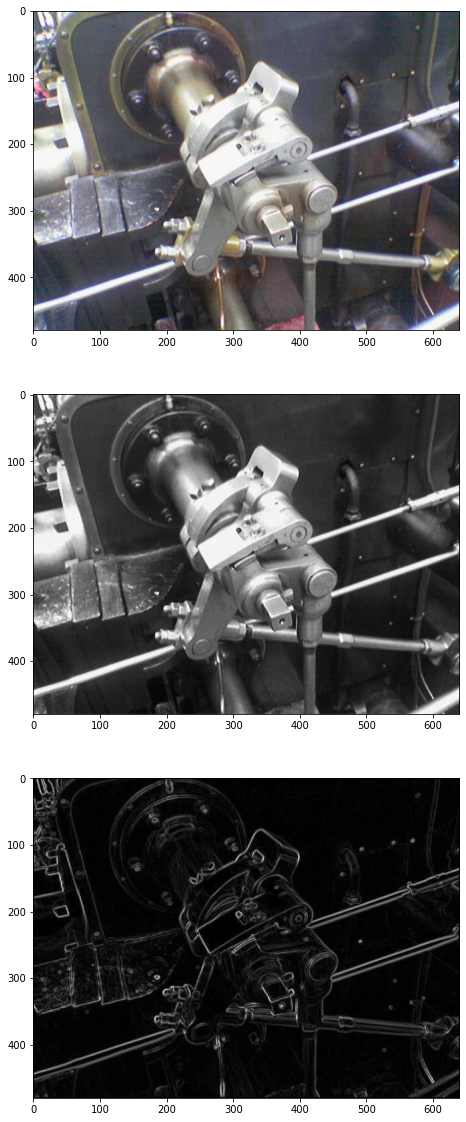

In [24]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image_file = 'original_image.png'
input_image = plt.imread(image_file)

r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

gamma = 1.400
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma

"""
     |                 |                 |                  |
     | 1.0   0.0  -1.0 |                 |  1.0   2.0   1.0 |
Gx = | 2.0   0.0  -2.0 |    and     Gy = |  0.0   0.0   0.0 |
     | 1.0   0.0  -1.0 |                 | -1.0  -2.0  -1.0 |
     |                 |                 |                  |
"""

Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

[rows, columns] = np.shape(grayscale_image)
sobel_filtered_image = np.zeros(shape=(rows, columns))

for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)

fig = plt.figure(figsize=(20, 20)) 
   
fig.add_subplot(3, 1, 1) 
plt.imshow(input_image) 
fig.add_subplot(3, 1, 2) 
plt.imshow(grayscale_image, cmap=plt.get_cmap('gray')) 
fig.add_subplot(3, 1, 3)  
plt.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
plt.show()

# plt.imsave('sobel_filtered_image.png', sobel_filtered_image, cmap=plt.get_cmap('gray'))


In [38]:
from PIL import Image

def convert_png_to_raw(jpg_path, raw_color_path, raw_gray_path):
    
    img = Image.open(jpg_path)
    img = img.convert('RGB')

    img_array = np.array(img)

    raw_color_data = img_array.flatten()

    img_gray = img.convert('L')
    img_gray_array = np.array(img_gray)

    raw_gray_data = img_gray_array.flatten()

    with open(raw_color_path, 'wb') as raw_color_file:
        raw_color_data.tofile(raw_color_file)

    with open(raw_gray_path, 'wb') as raw_gray_file:
        raw_gray_data.tofile(raw_gray_file)

def read_raw_file(file_path):
    try:
        with open(file_path, 'rb') as file:
            data = file.read()
        return data
    except FileNotFoundError:
        print("Podany plik nie istnieje.")
    except Exception as e:
        print("Wystąpił błąd podczas odczytu pliku:", e)

In [37]:
from pynq import allocate, Overlay

In [ ]:
sobel_filter_ov = Overlay("TBD.bit")

In [ ]:
sobel_filter_ov?

In [ ]:
dma = sobel_filter.axi_dma_0
resizer = sobel_filter.resize_accel_0

640 480


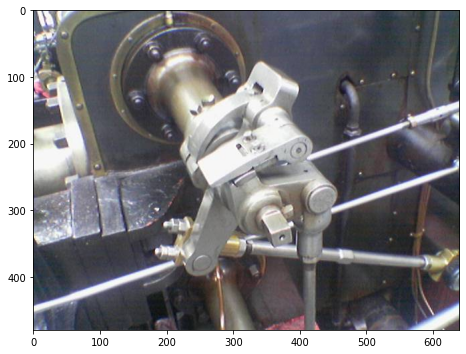

In [33]:
image_file = 'original_image.png'

input_image = plt.imread(image_file)
original_image = Image.open(image_file)

image_width, image_height = original_image.size

print(image_width, image_height)

fig = plt.figure(figsize=(20, 20))
   
fig.add_subplot(3, 1, 1)
plt.imshow(input_image) 

In [36]:
convert_png_to_raw('original_image.png', 'image_color.raw', 'image_gray.raw')

In [ ]:
in_buffer = allocate(shape=(image_height, image_width, 3), 
                           dtype=np.uint8, cacheable=1)
out_buffer = allocate(shape=(image_height-2, image_width-2, 3),
                            dtype=np.uint8, cacheable=1)

In [41]:
data_to_send = read_raw_file('image_gray.raw')
in_buffer[:] = np.array(data_to_send)

NameError: name 'in_buffer' is not defined